<a href="https://colab.research.google.com/github/SithijaDeshan/Machine-Learning/blob/main/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk

#Read Dataset


In [ ]:
df = pd.read_csv("spam.csv",encoding="latin-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)

In [ ]:
df.sample(5)

,class,sms
1843,ham,Super da:)good replacement for murali
1742,ham,\EY! CALM DOWNON THEACUSATIONS.. ITXT U COS IW...
4283,ham,Yes. I come to nyc for audiitions and am tryin...
4334,ham,"Now u sound like manky scouse boy steve,like! ..."
2341,ham,Tell dear what happen to you. Why you talking ...


In [ ]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [ ]:
df['Length'] = df['sms'].apply(len)

In [ ]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

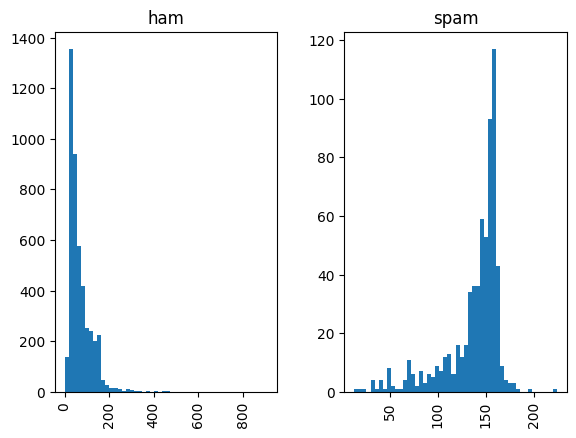

In [ ]:
df.hist(column='Length', by='class', bins=50)

#Data preprocessing


In [ ]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**Preposition Tasks**



*   Lower Case
*   Tokenization
*   Removing special characters
*   Removing stop words and puctuation
*   Stemming



In [ ]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

In [ ]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


#Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
tf_vec = TfidfVectorizer(max_features=3000)
X = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
Y = df['class'].values

#Learning

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_teast,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_teast)
print(accuracy_score(y_test,y_pred))

0.9709864603481625
